<a href="https://colab.research.google.com/github/senasung37/AI07/blob/main/Section1_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_AI_07_%EC%84%B1%EC%84%B8%EC%9D%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 설치

In [ ]:
# 라이브러리
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import math
import urllib

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from numpy import linalg as LA
from numpy import array
from numpy.linalg import norm

from scipy import stats
from scipy.spatial import distance

import statsmodels.api as sm

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs


# EDA

In [ ]:
#파일 업로드
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (2).csv


In [ ]:
#데이터프레임 생성
df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [ ]:
#결측치 확인
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
#데이터의 단위(string) 삭제 및 float 타입으로 변경
def unit(series):
  return series.apply(lambda x: float(x[:-1]) / 1000 if 'K' in x else (float(x[:-1]) if 'M' in x else x))

In [ ]:
#float형식의 데이터가 담긴 df2 생성
df2 = df
df2['NA_Sales_2'] = unit(df2['NA_Sales']).astype(float)
df2['EU_Sales_2'] = unit(df2['EU_Sales']).astype(float)
df2['JP_Sales_2'] = unit(df2['JP_Sales']).astype(float)
df2['Other_Sales_2'] = unit(df2['Other_Sales']).astype(float)
df2.head(50)


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,NA_Sales_2,EU_Sales_2,JP_Sales_2,Other_Sales_2
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04,0.12,0.09,0.00,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0,0.00,0.00,0.14,0.00
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0,0.02,0.01,0.00,0.00
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01,0.07,0.00,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0,0.00,0.00,0.04,0.00
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01,0.04,0.03,0.00,0.01


In [ ]:
df2.dtypes

Unnamed: 0         int64
Name              object
Platform          object
Year             float64
Genre             object
Publisher         object
NA_Sales          object
EU_Sales          object
JP_Sales          object
Other_Sales       object
NA_Sales_2       float64
EU_Sales_2       float64
JP_Sales_2       float64
Other_Sales_2    float64
dtype: object

In [ ]:
#index 변경
df2 = df2.rename(columns={'Unnamed: 0': 'No'} )
df2 = df2.set_index('No')
df2


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,NA_Sales_2,EU_Sales_2,JP_Sales_2,Other_Sales_2
No,,,,,,,,,,,,,
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.44,0.19,0.03,0.13


# **사전분석 - 지역별 판매량 비교**

In [ ]:
#기술통계치 확인
df2.describe()

,Year,NA_Sales_2,EU_Sales_2,JP_Sales_2,Other_Sales_2
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,1994.242543,0.264667,0.146652,0.077782,0.048063
std,155.077168,0.816683,0.505351,0.309291,0.188588
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


*가설설정

ANOVA

영가설: 북미, 유럽, 일본, 기타 판매량 간에 차이가 없을 것이다.

대립가설: 북미, 유럽, 일본, 기타 판매량 간에 차이가 있을 것이다.


T-TEST

영가설: 대립가설: 북미-유럽, 유럽-일본, 일본-기타 간의 차이가 없다.

대립가설: 북미-유럽, 유럽-일본, 일본-기타 간의 차이가 있다.

In [ ]:
#지역별 판매량 ANOVE ONE-WAY TEST, T-TEST
stats.f_oneway(df2['NA_Sales_2'], df2['EU_Sales_2'], df2['JP_Sales_2'], df2['Other_Sales_2'])

F_onewayResult(statistic=583.5130824706904, pvalue=0.0)

In [ ]:
stats.ttest_ind(df2['NA_Sales_2'], df2['EU_Sales_2'])

Ttest_indResult(statistic=15.831371100049903, pvalue=3.0384925458019944e-56)

In [ ]:
stats.ttest_ind(df2['EU_Sales_2'], df2['JP_Sales_2'])

Ttest_indResult(statistic=14.975505367533982, pvalue=1.5530415940231134e-50)

In [ ]:
stats.ttest_ind(df2['JP_Sales_2'], df2['Other_Sales_2'])

Ttest_indResult(statistic=10.569304168620661, pvalue=4.549699477449226e-26)

*결론

ONE-WAY ANOVA와 T-TEST의 P-value 가 모두 0.05 미만이기 때문에 영가설을 기각했다. 북미, 유럽, 일본, 기타 판매량 간에 차이가 있으며, 북미-유럽, 유럽-일본, 일본-기타 간의 차이도 있다.

# **필수질문1 - 지역별 장르별 판매량 비교**

In [ ]:
#EDA
df2 = df2.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

In [ ]:
df2 = df2.rename(columns = {'NA_Sales_2': 'NA_Sales', 'EU_Sales_2': 'EU_Sales', 'JP_Sales_2': 'JP_Sales', 'Other_Sales_2': 'Other_Sales'}, inplace = False)
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
No,,,,,,,,,
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13


In [ ]:
#tidy 데이터로 변환
df_tidy = pd.melt(df2, id_vars=['Year', 'Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
df_tidy = df_tidy.rename(columns={'variable' : 'Region', 'value' : 'Sales'})
df_tidy

,Year,Genre,Region,Sales
0,2008.0,Action,NA_Sales,0.04
1,2009.0,Action,NA_Sales,0.17
2,2010.0,Adventure,NA_Sales,0.00
3,2010.0,Misc,NA_Sales,0.04
4,2010.0,Platform,NA_Sales,0.12
...,...,...,...,...
66387,2006.0,Platform,Other_Sales,0.01
66388,2005.0,Action,Other_Sales,0.00
66389,2015.0,Sports,Other_Sales,0.13
66390,2013.0,Action,Other_Sales,0.03


In [ ]:
df_tidy.isnull().sum()

Year      1084
Genre      200
Region       0
Sales        0
dtype: int64

In [ ]:
#크로스탭
df_cross = pd.crosstab(df_tidy['Region'], df_tidy['Genre'], values=df_tidy['Sales'], aggfunc=sum)
df_cross

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Region,,,,,,,,,,,,
EU_Sales,522.16,64.05,101.22,212.36,201.61,50.73,237.10,183.58,313.05,113.35,376.48,45.32
JP_Sales,157.90,51.95,87.34,105.27,130.65,56.87,56.40,344.95,38.28,63.70,135.37,49.46
NA_Sales,874.81,105.66,223.20,408.05,446.44,123.35,357.19,319.54,581.92,182.96,680.52,68.70
Other_Sales,186.45,16.81,36.64,74.04,51.53,12.52,77.10,56.96,102.65,31.48,134.67,11.36


In [ ]:
#카이스퀘어 분석
from scipy.stats import chi2_contingency
chi2 = chi2_contingency(df_cross)
chi2

(696.7959761665393,
 2.508335032354097e-125,
 33,
 array([[475.6200157 ,  65.13513033, 122.47491273, 218.43362447,
         226.76705352,  66.50081847, 198.78683483, 247.19774815,
         282.94326963, 106.93065028, 362.46455886,  47.75538301],
        [251.09725564,  34.38722495,  64.65899974, 115.31912416,
         119.71864709,  35.10822183, 104.94686312, 130.50476034,
         149.37613254,  56.45261331, 191.35833857,  25.21181872],
        [858.96895075, 117.63393614, 221.18948701, 394.49075948,
         409.54091837, 120.10036664, 359.00869034, 446.43871862,
         510.99507046, 193.11657509, 654.61038546,  86.24614163],
        [155.6337779 ,  21.31370858,  40.07660052,  71.47649189,
          74.20338101,  21.76059306,  65.04761171,  80.88877289,
          92.58552738,  34.99016132, 118.6067171 ,  15.62665663]]))

결론: P-value가 0.05 미만이므로, 영가설을 기각한다. 지역에 따라서 선호하는 게임 장르가 다르다.

In [ ]:
#각 수치를 비율로 변환(%)
df_cross3 = pd.crosstab(df_tidy['Region'], df_tidy['Genre'], values=df_tidy['Sales'], aggfunc=np.sum).apply(lambda r: r/r.sum()*100, axis=1)
df_cross3

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Region,,,,,,,,,,,,
EU_Sales,21.567858,2.645590,4.180900,8.771546,8.327516,2.095406,9.793433,7.582786,12.930554,4.681930,15.550535,1.871946
JP_Sales,12.353889,4.064500,6.833367,8.236187,10.221885,4.449434,4.412662,26.988436,2.994977,4.983805,10.591172,3.869686
NA_Sales,20.007822,2.416555,5.104818,9.332531,10.210551,2.821144,8.169310,7.308215,13.309121,4.184487,15.564206,1.571241
Other_Sales,23.535426,2.121912,4.625036,9.346007,6.504588,1.580389,9.732268,7.190013,12.957423,3.973694,16.999280,1.433963


In [ ]:
#표 정렬(미국-유럽-일본-기타 순)
df_cross3['Index2'] = [2, 3, 1, 4]
df_cross3 = df_cross3.sort_values("Index2")
df_cross3

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Index2
Region,,,,,,,,,,,,,
NA_Sales,20.007822,2.416555,5.104818,9.332531,10.210551,2.821144,8.169310,7.308215,13.309121,4.184487,15.564206,1.571241,1
EU_Sales,21.567858,2.645590,4.180900,8.771546,8.327516,2.095406,9.793433,7.582786,12.930554,4.681930,15.550535,1.871946,2
JP_Sales,12.353889,4.064500,6.833367,8.236187,10.221885,4.449434,4.412662,26.988436,2.994977,4.983805,10.591172,3.869686,3
Other_Sales,23.535426,2.121912,4.625036,9.346007,6.504588,1.580389,9.732268,7.190013,12.957423,3.973694,16.999280,1.433963,4


In [ ]:
df_cross3 = df_cross3.drop('Index2', axis=1)
df_cross3

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Region,,,,,,,,,,,,
NA_Sales,20.007822,2.416555,5.104818,9.332531,10.210551,2.821144,8.169310,7.308215,13.309121,4.184487,15.564206,1.571241
EU_Sales,21.567858,2.645590,4.180900,8.771546,8.327516,2.095406,9.793433,7.582786,12.930554,4.681930,15.550535,1.871946
JP_Sales,12.353889,4.064500,6.833367,8.236187,10.221885,4.449434,4.412662,26.988436,2.994977,4.983805,10.591172,3.869686
Other_Sales,23.535426,2.121912,4.625036,9.346007,6.504588,1.580389,9.732268,7.190013,12.957423,3.973694,16.999280,1.433963


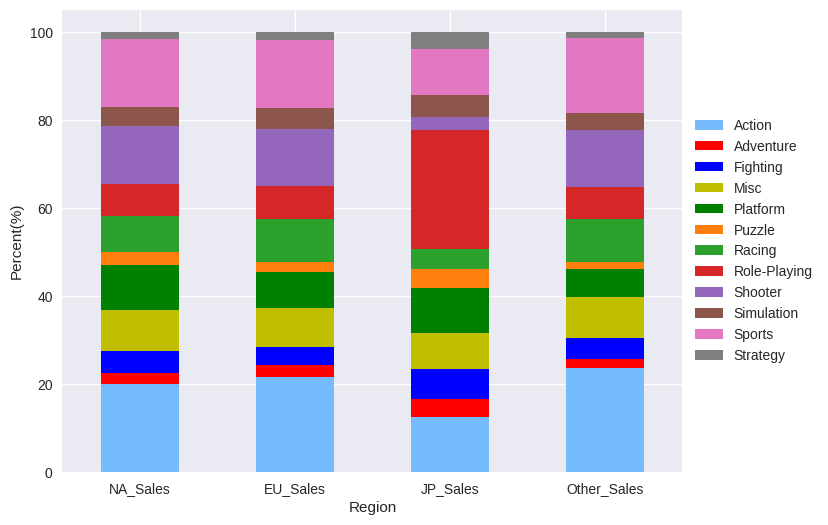

In [ ]:
#시각화
ax = df_cross3.plot(kind="bar",stacked=True,figsize=(8,6), rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent(%)')
pass
pass

지역에 따라서 선호하는 게임장르가 다른데, 특히 일본에서 다르게 나타났다. 일본은 액션 장르가 타 지역에 비해 비중이 낮았고, 롤플레잉 장르의 비중이 높았다. 나머지 지역은 유사한 proportion을 보였다.

# 추가분석 1 - 일본 제외 지역에서 장르별 판매량 비교

In [ ]:
#일본 제외 데이터
df_cross4 = df_cross3.drop('JP_Sales')
df_cross4

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Region,,,,,,,,,,,,
NA_Sales,20.007822,2.416555,5.104818,9.332531,10.210551,2.821144,8.169310,7.308215,13.309121,4.184487,15.564206,1.571241
EU_Sales,21.567858,2.645590,4.180900,8.771546,8.327516,2.095406,9.793433,7.582786,12.930554,4.681930,15.550535,1.871946
Other_Sales,23.535426,2.121912,4.625036,9.346007,6.504588,1.580389,9.732268,7.190013,12.957423,3.973694,16.999280,1.433963


In [ ]:
#카이스퀘어 검증
chi3 = chi2_contingency(df_cross4)
chi3

(2.0540758228348492,
 0.9999999868528614,
 22,
 array([[21.70370205,  2.39468572,  4.636918  ,  9.15002794,  8.34755183,
          2.16564644,  9.23167036,  7.36033776, 13.06569907,  4.28003705,
         16.03800703,  1.62571675],
        [21.70370205,  2.39468572,  4.636918  ,  9.15002794,  8.34755183,
          2.16564644,  9.23167036,  7.36033776, 13.06569907,  4.28003705,
         16.03800703,  1.62571675],
        [21.70370205,  2.39468572,  4.636918  ,  9.15002794,  8.34755183,
          2.16564644,  9.23167036,  7.36033776, 13.06569907,  4.28003705,
         16.03800703,  1.62571675]]))

일본을 제외한 데이터에서는 카이스퀘어 검정을 실시했을 때 p-value가 0.05 이상이기 때문에 영가설을 기각하지 못했다. 따라서 일본을 제외한 북미, 유럽, 기타 지역에서는 지역에 따른 게임장르의 판매량 차이가 나타나지 않았다.

# 필수질문2 - 연도별 게임의 트렌드

In [ ]:
#데이터프레임 준비
df3 = df2
df3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
No,,,,,,,,,,
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79


In [ ]:
df3.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Total_Sales      0
dtype: int64

In [ ]:
#Year에서 이상치 연도형식으로 변환
def year(series):
  return series.apply(lambda x: x + 2000 if x < 21 else (x + 1900 if 20 < x <100 else x))

In [ ]:
#Year에서 결측치 처리 및 정수로 변환
df3 = df3.dropna(subset=['Year'])
df3['Year'] = year(df3['Year']).astype(int)

In [ ]:
#총 판매량 열 추가
df3['Total_Sales'] = df3.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
df3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
No,,,,,,,,,,
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79


<BarContainer object of 16327 artists>

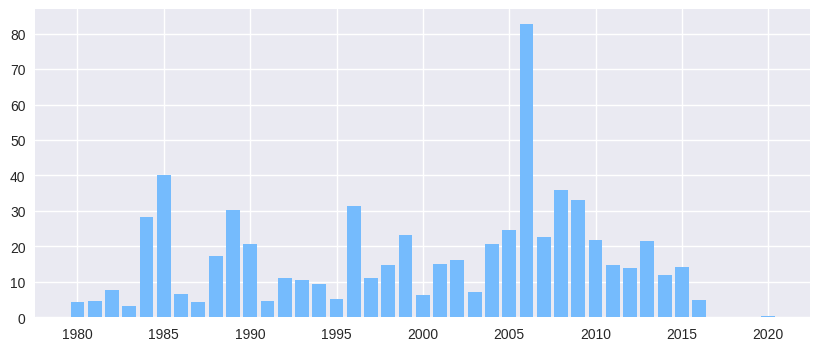

In [ ]:
plt.bar(df3.Year, df3.Total_Sales)


In [ ]:
df3.plot(x='Year', y="Total_Sales", kind="bar")

Error in callback <function flush_figures at 0x7f7177b77320> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
#연도/장르 크로스탭
df_cross2 = pd.crosstab(df3['Year'], df3['Genre'], values=df3['Total_Sales'], aggfunc=sum)
df_cross2

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,NaN,0.77,2.70,NaN,NaN,NaN,NaN,7.07,NaN,NaN,NaN
1981,14.79,NaN,NaN,NaN,6.92,2.25,0.48,NaN,10.02,0.44,0.78,NaN
1982,6.50,NaN,NaN,0.87,5.03,10.04,1.57,NaN,3.81,NaN,1.06,NaN
1983,2.86,0.40,NaN,2.14,6.93,0.78,NaN,NaN,0.49,NaN,3.20,NaN
1984,1.85,NaN,NaN,1.45,0.69,3.14,5.95,NaN,31.10,NaN,6.17,NaN
1985,3.52,NaN,1.05,NaN,43.17,3.21,NaN,NaN,1.00,0.04,1.96,NaN
1986,13.74,NaN,NaN,NaN,9.39,NaN,1.96,2.52,3.89,NaN,5.58,NaN
1987,1.11,4.38,5.42,NaN,1.74,NaN,NaN,4.65,0.69,NaN,3.71,NaN
1988,1.74,NaN,NaN,NaN,27.73,5.58,2.14,5.88,0.51,0.03,3.60,NaN


In [ ]:
df_cross2.isnull().sum()

Genre
Action           1
Adventure       11
Fighting        10
Misc             8
Platform         3
Puzzle           6
Racing           7
Role-Playing     7
Shooter          3
Simulation       8
Sports           3
Strategy        13
dtype: int64

In [ ]:
#결측치 처리
df_cross2 = df_cross2.fillna(0)
df_cross2

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,0.00,0.77,2.70,0.00,0.00,0.00,0.00,7.07,0.00,0.00,0.00
1981,14.79,0.00,0.00,0.00,6.92,2.25,0.48,0.00,10.02,0.44,0.78,0.00
1982,6.50,0.00,0.00,0.87,5.03,10.04,1.57,0.00,3.81,0.00,1.06,0.00
1983,2.86,0.40,0.00,2.14,6.93,0.78,0.00,0.00,0.49,0.00,3.20,0.00
1984,1.85,0.00,0.00,1.45,0.69,3.14,5.95,0.00,31.10,0.00,6.17,0.00
1985,3.52,0.00,1.05,0.00,43.17,3.21,0.00,0.00,1.00,0.04,1.96,0.00
1986,13.74,0.00,0.00,0.00,9.39,0.00,1.96,2.52,3.89,0.00,5.58,0.00
1987,1.11,4.38,5.42,0.00,1.74,0.00,0.00,4.65,0.69,0.00,3.71,0.00
1988,1.74,0.00,0.00,0.00,27.73,5.58,2.14,5.88,0.51,0.03,3.60,0.00


In [ ]:
#연도별/장르별 트렌드 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use(['seaborn'])
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['xkcd:sky blue', 'r', 'b', 'y',  'g', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])*cycler(linestyle=['-', '--'])))

In [ ]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

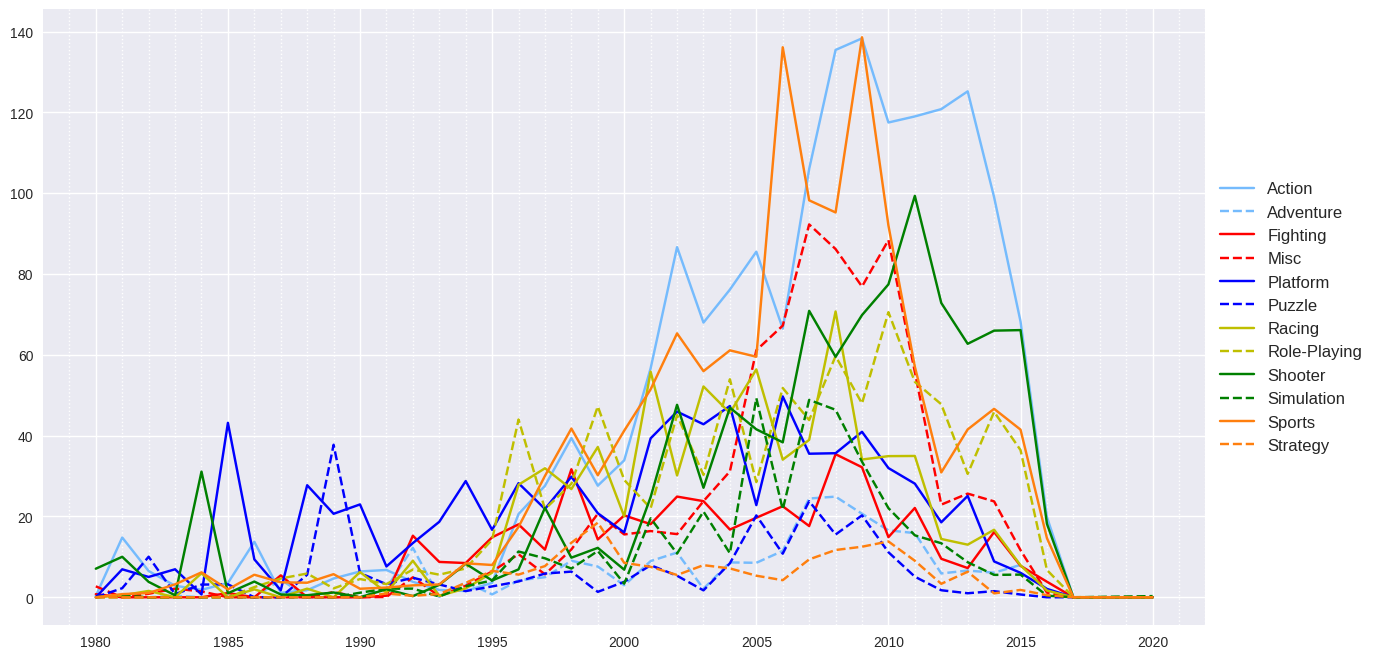

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
for col in df_cross2.columns:
  plt.plot(df_cross2.index, df_cross2[col], label=col)
  plt.legend(fontsize='large', loc='center left', bbox_to_anchor=(1, 0.5))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))       
ax.grid(which='minor', linestyle=':')  
pass



**연도별 장르 트렌드**

2000년을 기점으로 전반적인 게임 판매량이 폭발적으로 증가했다. 특히 액션 및 스포츠 장르는 판매량이 급증하는 것이 확인되었다. 시뮬레이션, 슈팅도 판매량이 증가되었다. 그러나 2014~2016년에는 급격하게 대부분의 장르 게임 판매량이 감소하는 것으로 보여진다. 이는 스마트폰이 널리 보급되는 시점과 맞아떨어지는데, 스마트폰 사용의 급증으로 컴퓨터 게임 구매가 감소한 것으로 추정된다.(데이터 필요)

In [ ]:
df_cross_pf = pd.crosstab(df3['Year'], df3['Platform'], values=df3['Total_Sales'], aggfunc=sum)
df_cross_pf

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,53.44,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,NaN,45.01,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


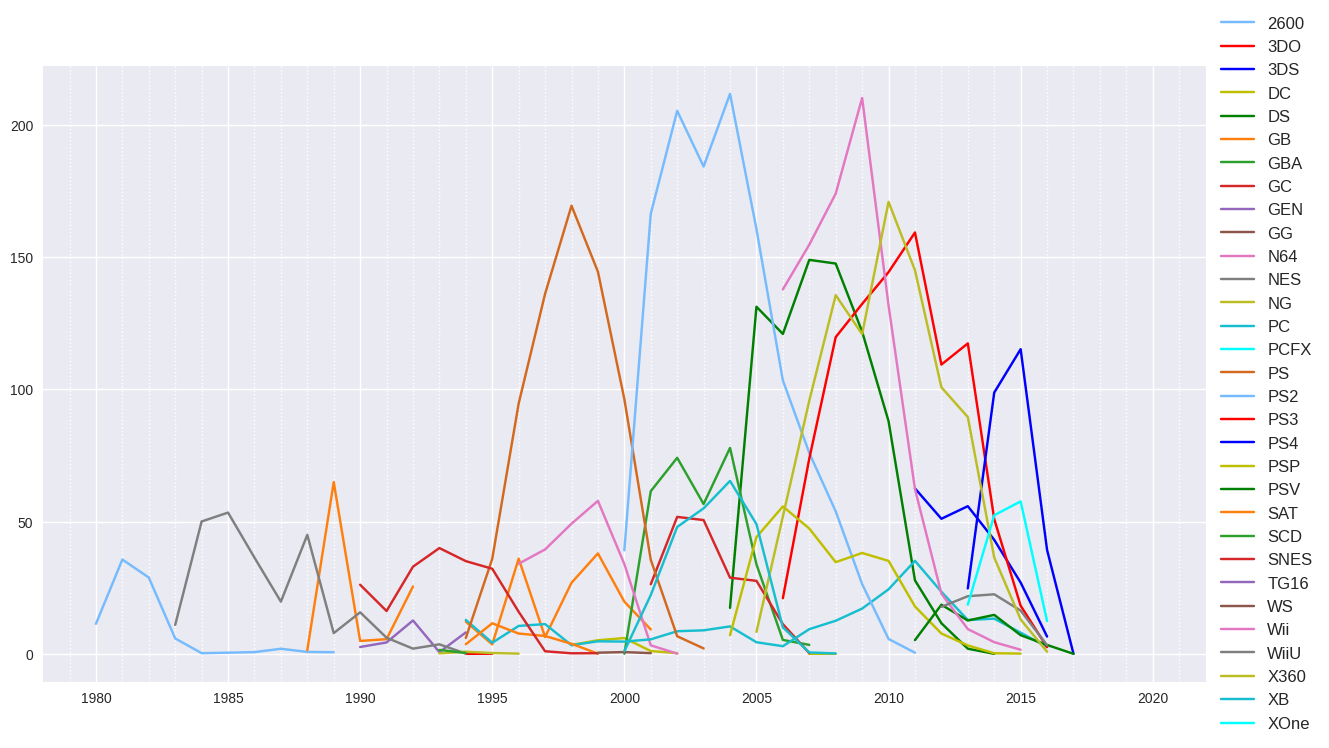

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
for col in df_cross_pf.columns:
  plt.plot(df_cross_pf.index, df_cross_pf[col], label=col)
  plt.legend(fontsize='large', loc='center left', bbox_to_anchor=(1, 0.5))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))       
ax.grid(which='minor', linestyle=':')  
pass

## 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [ ]:
#출고량이 높은 게임 리스트업 
df_gr = df3.groupby('Name').Total_Sales.sum().reset_index()
df_gr

,Name,Total_Sales
0,'98 Koshien,0.40
1,.hack//G.U. Vol.1//Rebirth,0.17
2,.hack//G.U. Vol.2//Reminisce,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.16
4,.hack//G.U. Vol.3//Redemption,0.17
...,...,...
11355,thinkSMART FAMILY!,0.03
11356,thinkSMART: Chess for Kids,0.01
11357,uDraw Studio,2.45
11358,uDraw Studio: Instant Artist,0.21


In [ ]:
df_gr = df_gr.sort_values(by=['Total_Sales'], ascending=False, na_position='first').reset_index().drop(columns=['index'])
df_gr

,Name,Total_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.83
...,...,...
11355,RollerCoaster Tycoon: Gold Edition,0.01
11356,Tsuyo Kiss 3 Portable,0.01
11357,Turbo Trainz,0.01
11358,Moe Moe 2-Ji Daisenryaku 2,0.01


In [ ]:
#1~10위 게임 리스트업
df_top = df_gr.head(10)
df_top

,Name,Total_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.83
5,Wii Sports Resort,33.00
6,Pokemon Red/Pokemon Blue,31.38
7,Call of Duty: Modern Warfare 3,30.84
8,New Super Mario Bros.,30.01
9,Call of Duty: Black Ops II,29.73


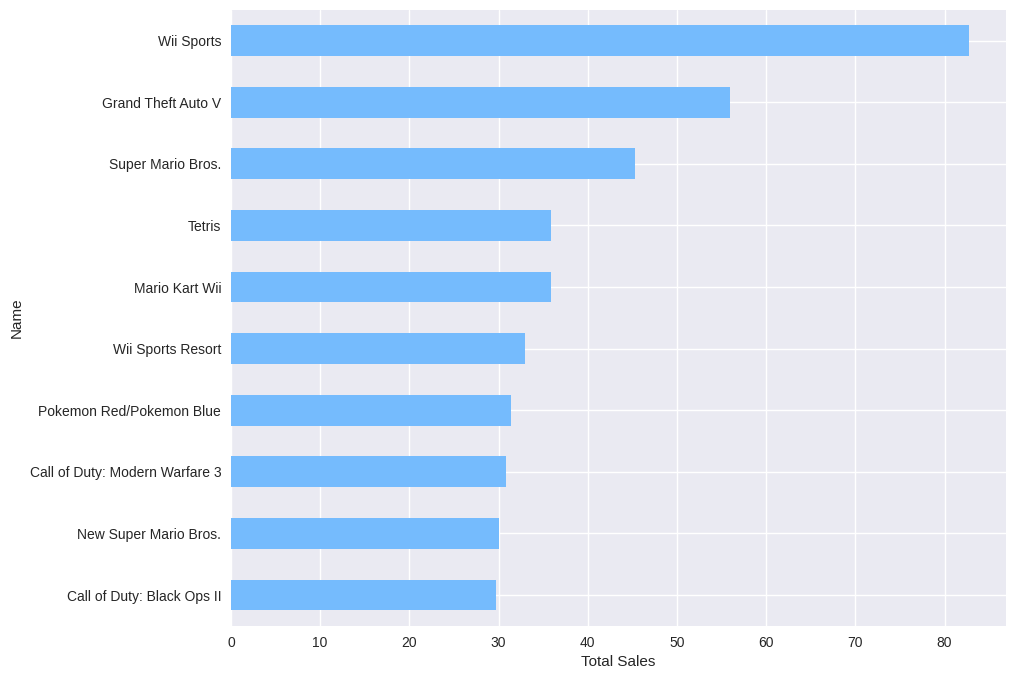

In [ ]:
#시각화
plt.rcParams['figure.figsize'] = (10, 8)
ax = df_top.plot.barh(x='Name', y='Total_Sales', legend=False)
ax.invert_yaxis()
ax.set_xlabel('Total Sales')
pass

*시각화 과정: 
1. 각 게임의 총 판매량을 계산(Total Sales)해서 데이터프레임에 추가
2. 총 판매량을 기준으로 groupby한 후 판매량 높은 순으로 sorting
3. top10을 뽑아서 새로운 dataframe으로 작성
4. 시각화(barh plot)

# 추가분석 2 - 장르/플랫폼별 판매량

In [ ]:
#연도 결측치 처리 전 df 
df2['Total_Sales'] = df2.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
No,,,,,,,,,,
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79


In [ ]:
#플랫폼 묶음 작업
df_sum = df_cross5
df_sum['PS_sum'] = df_cross5.loc[ : , ['PS', 'PS2','PS3','PS4','PSP','PSV']].sum(axis=1)
df_sum['GB_sum'] = df_cross5.loc[ : , ['GB', 'GBA']].sum(axis=1)
df_sum['NT_sum'] = df_cross5.loc[ : , ['DS', '3DS', 'GC', 'N64', 'NES', 'SNES' ]].sum(axis=1)
df_sum['SG_sum'] = df_cross5.loc[ : , ['GEN', 'SAT', 'SCD']].sum(axis=1)
df_sum['WII_sum'] = df_cross5.loc[ : , ['Wii', 'WiiU']].sum(axis=1)
df_sum['XB_sum'] = df_cross5.loc[ : , ['X360', 'XB', 'XOne']].sum(axis=1)


df_sum.head(20)

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne,PS_sum,GB_sum,NT_sum,SG_sum,WII_sum,XB_sum
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,26.31,NaN,56.49,1.26,114.02,7.93,54.13,37.11,2.74,NaN,29.31,28.75,NaN,29.66,NaN,125.59,269.68,301.49,84.70,62.68,19.99,0.65,NaN,10.08,NaN,NaN,110.32,19.31,239.60,47.44,33.78,864.13,62.06,275.76,3.39,129.63,320.82
Adventure,0.40,0.06,4.74,2.50,47.11,17.15,12.05,5.93,0.19,NaN,0.45,4.38,NaN,10.03,NaN,20.71,21.22,22.85,4.70,10.68,4.12,4.16,NaN,1.50,0.14,NaN,18.26,0.19,15.19,3.02,2.49,84.28,29.20,64.11,4.35,18.45,20.70
Fighting,0.77,NaN,10.44,1.83,7.20,NaN,4.16,18.43,5.89,NaN,22.11,6.54,1.42,0.14,NaN,72.74,89.20,51.71,8.04,21.89,3.18,8.53,NaN,26.94,NaN,NaN,23.81,6.34,37.09,12.80,2.34,246.76,4.16,91.66,14.42,30.15,52.23
Misc,3.57,NaN,10.47,NaN,137.52,13.35,36.09,16.44,0.03,NaN,11.14,3.59,NaN,8.40,NaN,44.88,98.02,45.82,7.37,13.68,5.20,1.20,0.09,5.02,NaN,NaN,208.51,12.21,89.36,8.57,6.88,214.97,49.44,184.18,1.32,220.72,104.81
Platform,13.26,NaN,32.25,2.53,77.36,53.88,77.99,28.59,15.44,0.04,36.10,95.78,NaN,0.47,NaN,64.22,72.13,29.74,6.99,16.56,3.01,0.76,1.50,65.65,NaN,NaN,90.70,21.26,11.37,9.63,0.80,192.65,131.87,335.73,17.70,111.96,21.80
Puzzle,13.67,0.02,5.56,NaN,83.39,47.47,11.99,3.85,NaN,NaN,3.39,20.99,NaN,0.93,NaN,12.06,5.94,0.45,0.02,5.42,0.20,1.00,NaN,6.38,NaN,NaN,15.53,1.34,0.73,0.41,NaN,24.09,59.46,123.56,1.00,16.87,1.14
Racing,2.32,NaN,14.43,2.65,38.54,4.55,18.81,21.77,0.26,NaN,38.91,9.78,NaN,3.79,NaN,102.49,154.33,73.09,11.57,34.71,2.94,2.40,0.07,13.49,NaN,NaN,61.10,7.78,64.91,29.04,8.83,379.13,23.36,136.92,2.73,68.88,102.78
Role-Playing,NaN,NaN,61.34,0.68,126.49,88.24,64.15,13.04,0.27,NaN,3.02,18.78,NaN,47.22,0.03,76.55,85.66,75.32,25.78,48.92,13.08,3.76,0.06,36.45,NaN,1.22,14.08,2.44,71.97,13.51,9.46,325.31,152.39,259.12,4.09,16.52,94.94
Shooter,22.96,NaN,1.23,0.33,8.10,1.19,3.56,13.61,0.13,NaN,19.26,35.62,NaN,43.33,NaN,39.33,108.20,195.79,75.32,19.80,4.59,3.97,NaN,6.06,0.02,NaN,26.16,6.16,277.14,61.30,51.59,443.03,4.75,83.88,4.10,32.32,390.03


In [ ]:
#개별 플랫폼+묶은 플랫폼으로 새로운 열 형성
df_sum2 = df_sum[['PS_sum', 'XB_sum','NT_sum', 'WII_sum', 'SG_sum', 'GB_sum', 'PC', '2600', '3DO', 'DC', 'GG','NG', 'PCFX', 'TG16', 'WS']]
df_sum2 = df_sum2.fillna(0)
df_sum2['Total_Sales'] = df_sum2.loc[:,:].sum(axis=1)
df_sum2 = df_sum2.sort_values(by='Total_Sales', ascending=False)
df_sum2 = df_sum2.drop('Total_Sales', axis=1)
df_sum2


Platform,PS_sum,XB_sum,NT_sum,WII_sum,SG_sum,GB_sum,PC,2600,3DO,DC,GG,NG,PCFX,TG16,WS
Genre,,,,,,,,,,,,,,,
Action,864.13,320.82,275.76,129.63,3.39,62.06,29.66,26.31,0.00,1.26,0.00,0.00,0.00,0.00,0.00
Sports,610.29,213.04,139.44,293.27,6.00,25.38,11.97,2.28,0.00,3.65,0.00,0.02,0.00,0.00,0.00
Shooter,443.03,390.03,83.88,32.32,4.10,4.75,43.33,22.96,0.00,0.33,0.00,0.00,0.00,0.02,0.00
Role-Playing,325.31,94.94,259.12,16.52,4.09,152.39,47.22,0.00,0.00,0.68,0.00,0.00,0.03,0.00,1.22
Platform,192.65,21.80,335.73,111.96,17.70,131.87,0.47,13.26,0.00,2.53,0.04,0.00,0.00,0.00,0.00
Misc,214.97,104.81,184.18,220.72,1.32,49.44,8.40,3.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Racing,379.13,102.78,136.92,68.88,2.73,23.36,3.79,2.32,0.00,2.65,0.00,0.00,0.00,0.00,0.00
Fighting,246.76,52.23,91.66,30.15,14.42,4.16,0.14,0.77,0.00,1.83,0.00,1.42,0.00,0.00,0.00
Simulation,85.42,21.77,182.21,36.69,1.13,9.49,51.77,0.44,0.02,0.52,0.00,0.00,0.00,0.00,0.00


In [ ]:
#plot global setting
plt.rcParams.update({'font.size': 4})
plt.rc('axes', prop_cycle=(cycler('color', ['xkcd:sky blue', 'r', 'b', 'y',  'lightgreen', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'cyan', 'chocolate'])))

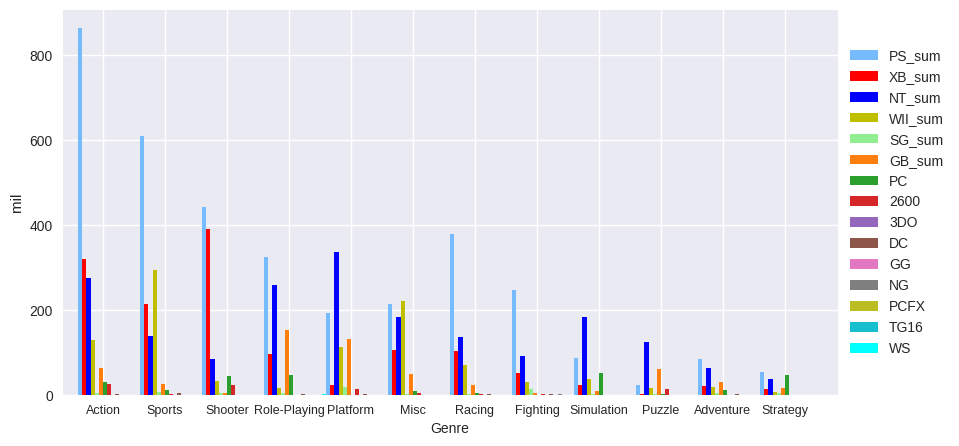

In [ ]:
#시각화 
ax = df_sum2.plot(position=0.4, kind="bar",figsize=(10, 5), width=1, rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('mil')
plt.xlabel('Genre', fontsize=10)
plt.xticks(fontsize=8)
pass


In [ ]:
stats.f_oneway(df_sum['PS_sum'],df_sum[ 'NT_sum'], df_sum['XB_sum'])


F_onewayResult(statistic=3.5966692904647264, pvalue=0.03863115234207945)

In [ ]:
chi4 = chi2_contingency(df_sum2)
chi4

(3331.4685142027993,
 0.0,
 154,
 array([[6.88543847e+02, 2.65245413e+02, 3.73917494e+02, 1.91937303e+02,
         1.24708230e+01, 1.10845679e+02, 4.95119037e+01, 1.68062909e+01,
         1.95467445e-02, 3.11770574e+00, 7.81869779e-03, 2.81473120e-01,
         5.86402334e-03, 3.12747912e-02, 2.77563772e-01],
        [5.24677952e+02, 2.02119910e+02, 2.84929225e+02, 1.46258327e+02,
         9.50290368e+00, 8.44656210e+01, 3.77286129e+01, 1.28065777e+01,
         1.48948334e-02, 2.37572592e+00, 5.95793334e-03, 2.14485600e-01,
         4.46845001e-03, 2.38317334e-02, 2.11506634e-01],
        [4.11895546e+02, 1.58673125e+02, 2.23682124e+02, 1.14819296e+02,
         7.46020236e+00, 6.63092720e+01, 2.96186404e+01, 1.00537335e+01,
         1.16931071e-02, 1.86505059e+00, 4.67724286e-03, 1.68380743e-01,
         3.50793214e-03, 1.87089714e-02, 1.66042121e-01],
        [3.62363574e+02, 1.39592092e+02, 1.96783516e+02, 1.01011849e+02,
         6.56308527e+00, 5.83353353e+01, 2.60568887e+01, 8.8447

# 추가분석 3 (ppt에 담지 않음)

In [ ]:
df_gr2 = df3.groupby('Name').Total_Sales.sum().reset_index()
df_gr2 = df_gr2.sort_values(by=['Total_Sales'], ascending=False, na_position='first').reset_index().drop(columns=['index'])
df_gr2

In [ ]:
df_cross7 = pd.crosstab(df3['Year'], df3['Name'], values=df3['Total_Sales'], aggfunc=sum)
df_cross7[df_top['Name']]

In [ ]:
df_top2 = df_cross7[df_top['Name']]
df_top2

NameError: ignored

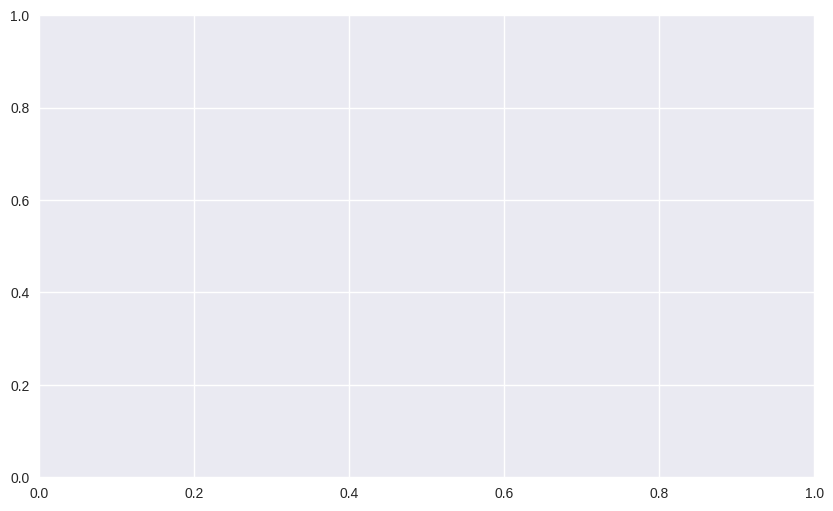

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2
for col in df_top2.columns:
  if col == 'Wii Sports' :
    plt.bar(df_top.index-width, df_top2[col], label=col)
  else:
    plt.bar(df_top.index, df_top[col], label=col)
  plt.legend(fontsize='x-small', loc='center left', bbox_to_anchor=(1, 0.5))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))       
ax.grid(which='minor', linestyle=':')  

pass

In [ ]:
df3

In [ ]:
from scipy.stats import kendalltau, pearsonr, spearmanr

def kendall_pval(x,y):
  return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
  return pearsonr(x,y)[1]
    
def spearmanr_pval(x,y):
  return spearmanr(x,y)[1]

In [ ]:
df3[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr(method=pearsonr_pval)

In [ ]:
df3[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr()